In [20]:
import qiskit as qk
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

# Building Circuits for State Preparation

Every computation in Qiskit begins with the qubits in the ground state $|0\cdots 0\rangle$. Therefore, in order to prepare a particular quantum state $|\psi\rangle$, one must determine the unitary operator $V$ satisfying $|\psi\rangle = V|0\cdots 0\rangle$. Qiskit possesses a variety of single and two-qubit unitary that can be decomposed into basis gates. While there is some freedom in choosing the basis gate set on Qiskit simulators, the hardware basis gate set is specifically defined by the $X_{\pi/2}$ gate (i.e., a $\pi/2$ rotation about the $\sigma^x$ axis of each qubit's individual Bloch Sphere), the $X_\pi$ gate, a frame change gate $R_z(\gamma)$ that is considered virtual (i.e., is implemented instantaneously in software), and the CNOT gate. Below, we show how to use these gates and those composed from this basis set to prepare quantum states.

We start by defining the quantum and classical registers required by the quantum algorithm and measurement operations, respectively. The registers are then used to initialize the quantum circuit.

In [11]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit

## Initial State in the XZ-plane of the Single Qubit Bloch Sphere

Consider the case where the objective is to prepare the state 
\begin{equation}
|\psi(\theta)\rangle=\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle.
\end{equation}

It can be shown that an $R_y(\theta)$ operation can be used to produce the correct state by $|\psi(\theta)\rangle=R_y(\theta)|0\rangle$. Here, we show how to construct $|\psi(\theta)\rangle$ in Qiskit using the built-in $R_y(\theta)$ gate directly. This particular operation is build from a composition of two $X_{\pi/2}$ gates interleaved with three $R_z$ gates. For more information, see the [Basic Quantum Operations](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html) tutorial given on the IBM Quantum Experience website.

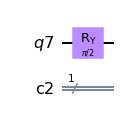

In [12]:
theta = np.pi/2
circ.ry(theta, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register
circ.draw('mpl')

Now that the state has been prepared, let's measure in the computational basis. This operation can be performed by using the built-in measure function in Qiskit as follows:

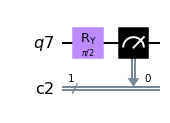

In [13]:
circ.measure(qr,cr)
circ.draw('mpl')

# Executing the Circuit

Qiskit has a number of options for executing a circuit that are locally available and via the cloud. Local simulators can be utilized for small simulations of 10-12 qubits. Local simulators range from full dynamics simulators that produce full time evolution operators resulting from a quantum circuit, the full quantum state resulting from a quantum circuit, or a simulation of the hardware and measurement process. Note: when using the time evolution or state simulator, there is no need to make a measurement on the system. The simulator will naturally yield the evolution operator or full quantum state.

In [14]:
qk.Aer.backends() # Available backends

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### State Vector Simulator

Let's first examine the state vector simulator and the results it yields.

In [15]:
backend = qk.Aer.get_backend('statevector_simulator')

In [16]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit
theta = np.pi/2
circ.ry(theta, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register

#job = backend.run(circ)
job = qk.execute(circ, backend=backend)
result = job.result()

Upon the completion of the job, we can check the state matches expectations by calling the get_statevector attribute

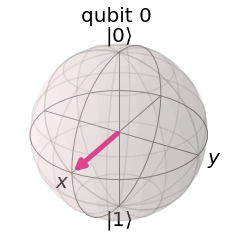

In [21]:
result.get_statevector(experiment=circ, decimals=3)
plot_bloch_multivector(result.get_statevector(experiment=circ, decimals=3))

### Unitary Simulator

We can also simulate the dynamics and extract the unitary operator resulting from the quantum circuit.

In [22]:
backend = qk.Aer.get_backend('unitary_simulator')

In [29]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit
theta = np.pi/2
circ.ry(theta*2, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register

# job = backend.run(circ)
job = qk.execute(circ, backend=backend)
result = job.result()

Similar to the state vector simulator, we can access the relevant information by calling the correct attribute of the result.

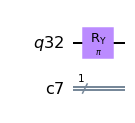

In [30]:
circ.draw('mpl')

In [31]:
result.get_unitary(experiment=circ, decimals=3)

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

### QASM Simulator

The QASM simulator can be used to simulate ideal and noisy quantum evolution. This particular simulator is distinct from the state vector simulator and unitary simulator in that it requires measurement operations to be defined along with the number of shots. As we have learned, quantum mechanics is probabilistic, which implies that one must sample from a quantum state in order to gain information about the underlying distribution. The number of shots corresponds to the number of times one repeats the experiment.

In [32]:
backend = qk.Aer.get_backend('qasm_simulator')

In [47]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit
theta = np.pi/2
circ.ry(theta/2, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register
circ.measure(qr,cr)

# job = backend.run(circ, shots=1000) # repeat the experiment 1000 times
job = qk.execute(circ, backend=backend,shots=100000)
result = job.result()

Now, our results will appear as a dictionary consisting of the measurement outcomes and their frequencies.

In [48]:
result.get_counts()

{'0': 85387, '1': 14613}

Qiskit includes useful visualization tools for examining the output of simulations and experiments. One of those tools is the plot_histogram function.

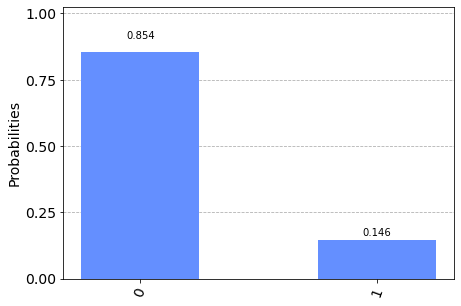

In [49]:
plot_histogram(result.get_counts())

There are a number of ways to run QASM simulations. Below, we show one additional approach that uses the execute() function.

In [51]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit
theta = np.pi/2
circ.ry(theta, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register
circ.measure(qr,cr)

job = qk.execute(circ, backend=backend, shots=1000)
result = job.result()

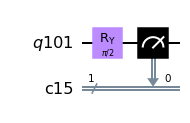

In [52]:
circ.draw('mpl')

In [53]:
result.get_counts()

{'1': 478, '0': 522}

### Running on Hardware

Now, let's run a real experiment! The first thing we need to do is obtain our token from the IBMQE website. Next, we save and enable the account so that this information can be loaded in the future.

In [57]:
token = 'b6464d13b284902ed1d1a48d2aed6bd0474c7be45011741b0fb879614419659cb722e74a046af3d5caae0398aec9bdac8843068ecbee91aff466cf3e30f3bef5'
try:
    IBMQ.load_account()
except:
    qk.IBMQ.save_account(token=token)
    qk.IBMQ.enable_account(token)
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_armonk")

ibmqfactory.load_account:WARNING:2022-02-18 15:20:55,546: Credentials are already in use. The existing account in the session will be replaced.


We have chosen to use the IBMQ Armonk device that consists of a single qubit. This will be sufficient for the example given here, but of course, there are many more sophisticated systems available on the cloud. Take a look at the IBMQE website, under Services, for more information about processors available to you.

Once you have chosen a processor, you can examine the status of the device as follows:

In [59]:
backend.status()

You also have the ability to examine various aspects of the device properties and configuration.

In [60]:
backend.configuration().__dict__.keys()

dict_keys(['n_uchannels', 'u_channel_lo', 'meas_levels', 'qubit_lo_range', 'meas_lo_range', 'meas_kernels', 'discriminators', 'hamiltonian', 'rep_times', 'dt', 'dtm', 'channels', '_qubit_channel_map', '_channel_qubit_map', '_control_channels', 'acquisition_latency', 'conditional_latency', 'meas_map', '_data', 'backend_name', 'backend_version', 'n_qubits', 'basis_gates', 'gates', 'local', 'simulator', 'conditional', 'open_pulse', 'memory', 'max_shots', 'coupling_map', 'supported_instructions', 'dynamic_reprate_enabled', 'max_experiments', 'sample_name', 'n_registers', 'credits_required', 'online_date', 'description', 'processor_type', 'parametric_pulses'])

In [64]:
backend.properties().__dict__.keys()

dict_keys(['_data', 'backend_name', 'backend_version', 'last_update_date', 'general', 'qubits', 'gates', '_qubits', '_gates'])

OK, now the moment of truth. Let's run the state preparation circuit on the hardware and see what we get. Note that one of the primary differences between the QASM simulator code and the experiment is the inclusion of the job_monitor function. This can be extremely useful for keeping track of job progress while one waits in the queue.

In [65]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit
theta = np.pi/2
circ.ry(theta, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register
circ.measure(qr,cr)

job = qk.execute(circ, backend=backend, shots=1000) # Execute job
job_monitor(job, interval=30) # Monitor job progress in intervals of 30s
result = job.result() # Collect results

print(result.get_counts())

print(plot_histogram(result.get_counts()))

Job Status: job has successfully run
{'0': 474, '1': 526}
Figure(504x360)


Success?! If you received "Job Status: job has successfully run" then congrats! You have now performed your first experiment on a quantum computer!

### Simulating Noisy Hardware

Qiskit also allows for the simulation of noise models as well. The models can be [custom](https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html) or based on the [device noise parameters](https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html}). The links provided here go into depth about how to use qiskit to construct various [noise models](https://qiskit.org/documentation/apidoc/aer_noise.html) and simulate them. Here, we will briefly show how to load a device noise model.

First, we pull the noise model from the backend we would like to simulate.

In [67]:
device = 'ibmq_armonk'
device_backend = provider.get_backend(device)

noise_model = NoiseModel.from_backend(device_backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

Don't forget! We still need to define the simulator backend.

In [68]:
sim_backend = qk.Aer.get_backend('qasm_simulator')

Now, we run the simulation, but with additional specifications of the coupling map defining the topology of the hardware, the basis gates, and the noise model.

{'0': 49941, '1': 50059}


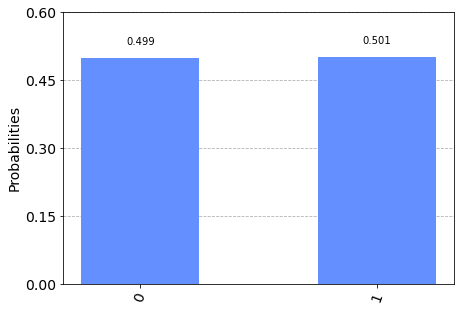

In [72]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register
circ = qk.QuantumCircuit(qr, cr) # Define base quantum circuit
theta = np.pi/2
circ.ry(theta, qr[0]) # Applying an Ry(theta) gate to the zeroth qubit in the register
circ.measure(qr,cr)

job = qk.execute(circ, backend=sim_backend, shots=100000,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model) # Execute job
result = job.result() # Collect results

print(result.get_counts())

plot_histogram(result.get_counts())

# Exercise

Let's compare the performance of simulators to hardware. Using the state preparation circuit defined above, you will vary $\theta$ and analyze the probability of being in the $|0\rangle$ and $|1\rangle$ states. This comparison will give some insight into the performance of hardware relative to both the ideal simulator and the hardware-informed noisy simulator.

First, construct a function that takes in $\theta$ and outputs a circuit for constructing the state $|\psi(\theta)\rangle$.

In [92]:
num_qubits = 1  # Number of qubits
qr = qk.QuantumRegister(num_qubits) # Define quantum register
cr = qk.ClassicalRegister(num_qubits) # Define classical register

def theta_vary_circ(theta):
    circ = qk.QuantumCircuit(qr,cr)
    # circuit here
    circ.ry(theta,0)
    circ.measure(0,0)
    return circ

Next, build a dictionary of circuits with various values of $\theta$. We will do this because IBMQE hardware jobs can take more than one circuit at a time. Typically, the limit is 75 circuits within a job.

In [106]:
circ_dict = {}
theta_vals = np.pi*np.linspace(0,1,75)
for theta in theta_vals:
    circ_dict[theta] = theta_vary_circ(theta)

[0.         0.04245395 0.08490791 0.12736186 0.16981582 0.21226977
 0.25472373 0.29717768 0.33963164 0.38208559 0.42453955 0.4669935
 0.50944746 0.55190141 0.59435537 0.63680932 0.67926328 0.72171723
 0.76417119 0.80662514 0.8490791  0.89153305 0.93398701 0.97644096
 1.01889491 1.06134887 1.10380282 1.14625678 1.18871073 1.23116469
 1.27361864 1.3160726  1.35852655 1.40098051 1.44343446 1.48588842
 1.52834237 1.57079633 1.61325028 1.65570424 1.69815819 1.74061215
 1.7830661  1.82552006 1.86797401 1.91042797 1.95288192 1.99533587
 2.03778983 2.08024378 2.12269774 2.16515169 2.20760565 2.2500596
 2.29251356 2.33496751 2.37742147 2.41987542 2.46232938 2.50478333
 2.54723729 2.58969124 2.6321452  2.67459915 2.71705311 2.75950706
 2.80196102 2.84441497 2.88686892 2.92932288 2.97177683 3.01423079
 3.05668474 3.0991387  3.14159265]


Next, let's execute the circuit on the ideal simulator. Note that you will need to perform the next step on the noisy simulator and the hardware of your choosing. Don't forget to make sure that the noise model used in the simulator matches the selected hardware!

In [140]:
sim_backend = qk.Aer.get_backend('qasm_simulator')
job = qk.execute(list(circ_dict.values()), backend=sim_backend, shots=10000,
                coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model) # Execute job
result = job.result() # Collect results

Let's compile the results into two lists: one with counts for $|0\rangle$ and the other with counts for $|1\rangle$.

In [141]:
counts0 = []
counts1 = []

for key in circ_dict.keys():
    circ = circ_dict[key]
    counts0.append(result.get_counts(circ).get('0',0)/1000)
    counts1.append(result.get_counts(circ).get('1',0)/1000)

Finally, we plot the results!

Text(0.5, 0, '$\\theta$')

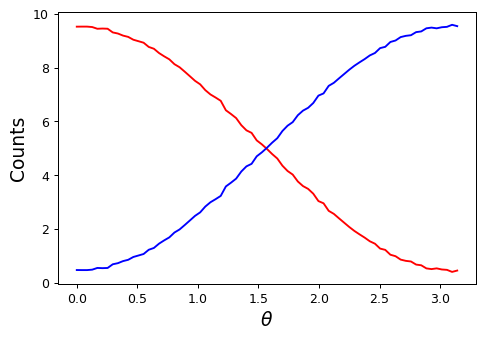

In [142]:
fig = plt.figure(dpi=90)
ax = fig.add_subplot(111)
ax.plot(theta_vals, counts0,'-r', label='0 Counts')
ax.plot(theta_vals, counts1,'-b', label='1 Counts')
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel(r'$\theta$', fontsize=15)